# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [2]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [3]:
def f(x):
    return (x**2) * numpy.sin(x)
    '''Function equivalent to x^2 sin(x).'''
    

Ensure your function works with numpy arrays:

In [4]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [5]:
def g(x):
    '''Analytical integral of f(x).'''
    # YOUR CODE HERE
    return (2*x)*numpy.sin(x)-(x**2-2)*numpy.cos(x)-2

Check your solution with the same numpy array:

In [6]:
assert g(0) == 0.

In [7]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [8]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    return g(xmax)-g(xmin)
    # YOUR CODE HERE

Check your analytic function:

In [9]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [10]:
def integrate_numeric(xmin, xmax, N):
    a=(xmax-xmin)/N
    x=0
    for i in range(1,N):
        x =x+(2*f(xmin+a*i))
    m=0
    for i in range(1,N+1):
        m=m+(4*f(xmin+(2*i-1)/2*a))
    return (a/6)*(f(xmin)+f(xmax)+x+m)




Make sure you have implemented Simpson's rule correctly:

In [16]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [17]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


Text(0,0.5,'Log(Fractional Error)')

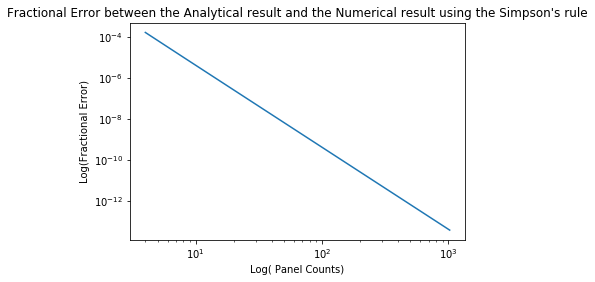

In [15]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)
results_numeric= []
for i in range(len(panel_counts)):
    results_numeric.append(integrate_numeric(x0, x1, panel_counts[i]))
fractional_error=((result_analytic-results_numeric)/results_numeric)
plt.yscale('log')
plt.xscale('log')
plt.plot(panel_counts, fractional_error) 
plt.title("Fractional Error between the Analytical result and the Numerical result using the Simpson's rule")
plt.xlabel("Log( Panel Counts)")
plt.ylabel("Log(Fractional Error)")
    # Define reference value from analytical solution

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

As the number of panels increases the accuracy of the numerical method increases as the error is N^(-4) with N being the number of panels. This is also shown by the decreasing line on the graph. When the numer of panels is too large (about N= 10^3.5) the numerical method no longer follows the N^(-4) error and stops increasing in accuracy. This is due to the numerical rounding error. 

If the trapezium rule was being used, how would the panel
count affect accuracy? 

If the trapezium method was being used the accuracy would also increase as the number of panels increases but at a slower rate N^(-2) up to approximately 10^6 Panels. So would not be as accurate as the simpson's method at a low number of panels. 